<a id="setup"></a>
# <p style="background-color: #2E8B57; font-family:calibri; color:white; font-size:140%; font-family:Verdana; text-align:center; border-radius:15px 50px;">I. Crop Water Requirement Prediction</p>

<a id="libraries"></a>
# <b><span style='color: #4CBB17' >Step 1.1 |</span><span style='color: #088F8F'> Importing Necessary Libraries</span></b>

In [1]:
#importing the libraries
import numpy as np
import pandas as pd
import pickle
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

import matplotlib.pyplot as plt
import seaborn as sns


#load the dataset
df = pd.read_csv('c_w_r.csv')

print(df.dtypes)

df.head()

CROP_TYPE             object
SOIL_TYPE             object
REGION                object
TEMPERATURE           object
WEATHER_CONDITION     object
WATER_REQUIREMENT    float64
dtype: object


,CROP_TYPE,SOIL_TYPE,REGION,TEMPERATURE,WEATHER_CONDITION,WATER_REQUIREMENT
0,BANANA,DRY,DESERT,Oct-20,NORMAL,8.75
1,BANANA,DRY,DESERT,Oct-20,SUNNY,10.25
2,BANANA,DRY,DESERT,Oct-20,WINDY,9.65
3,BANANA,DRY,DESERT,Oct-20,RAINY,0.75
4,BANANA,DRY,DESERT,20-30,NORMAL,9.85


In [2]:
print(df['CROP_TYPE'].value_counts())

BANANA       384
SOYABEAN     384
CABBAGE      384
POTATO       384
RICE         384
MELON        384
MAIZE        384
CITRUS       384
BEAN         384
WHEAT        384
MUSTARD      384
COTTON       384
SUGARCANE    384
TOMATO       384
ONION        384
Name: CROP_TYPE, dtype: int64


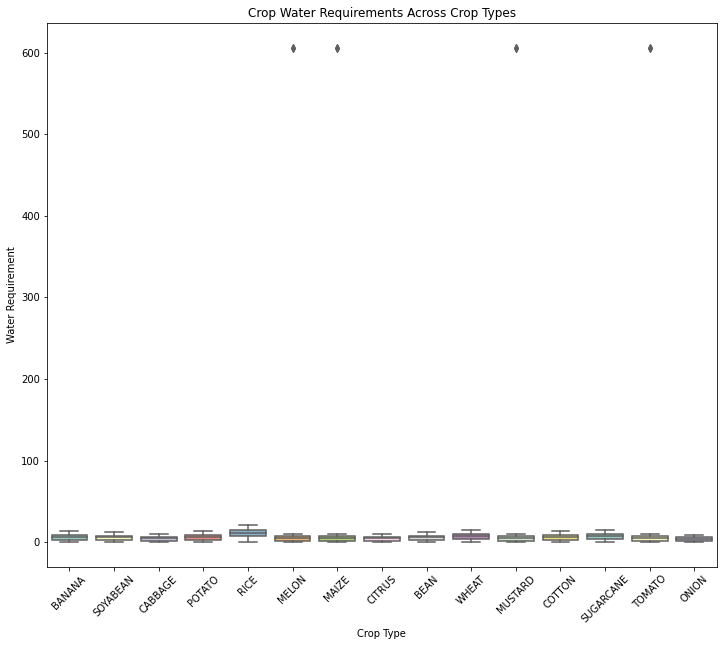

In [3]:
plt.figure(figsize=(12, 10))
sns.boxplot(x='CROP_TYPE', y='WATER_REQUIREMENT', data=df, palette='Set3')
plt.title('Crop Water Requirements Across Crop Types')
plt.xlabel('Crop Type')
plt.ylabel('Water Requirement')
plt.xticks(rotation=45)
plt.show()


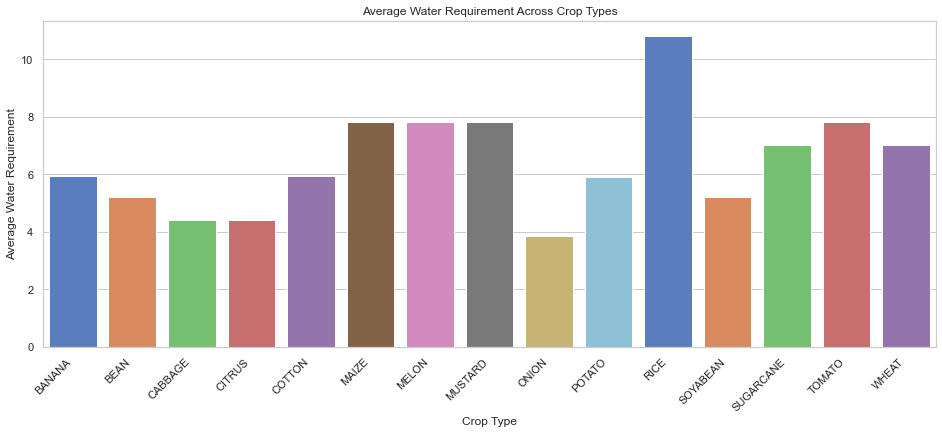

In [4]:

# Set the style for seaborn
sns.set(style="whitegrid")

# Calculate the average water requirement for each crop type
average_water_requirement = df.groupby('CROP_TYPE')['WATER_REQUIREMENT'].mean().reset_index()

# Visualization: Bar plot for average WATER_REQUIREMENT based on CROP_TYPE
plt.figure(figsize=(16, 6))
sns.barplot(x="CROP_TYPE", y="WATER_REQUIREMENT", data=average_water_requirement, palette="muted")
plt.title("Average Water Requirement Across Crop Types")
plt.xlabel("Crop Type")
plt.ylabel("Average Water Requirement")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()


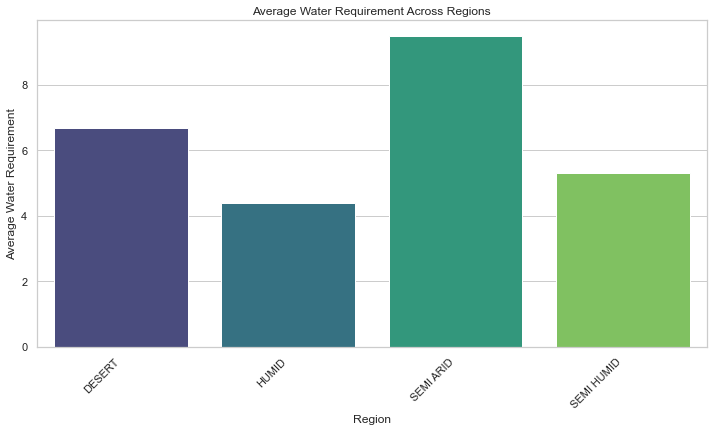

In [5]:
# Calculate the average water requirement for each region
average_water_requirement_region = df.groupby('REGION')['WATER_REQUIREMENT'].mean().reset_index()

# Visualization: Bar plot for average WATER_REQUIREMENT based on REGION
plt.figure(figsize=(12, 6))
sns.barplot(x="REGION", y="WATER_REQUIREMENT", data=average_water_requirement_region, palette="viridis")
plt.title("Average Water Requirement Across Regions")
plt.xlabel("Region")
plt.ylabel("Average Water Requirement")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()


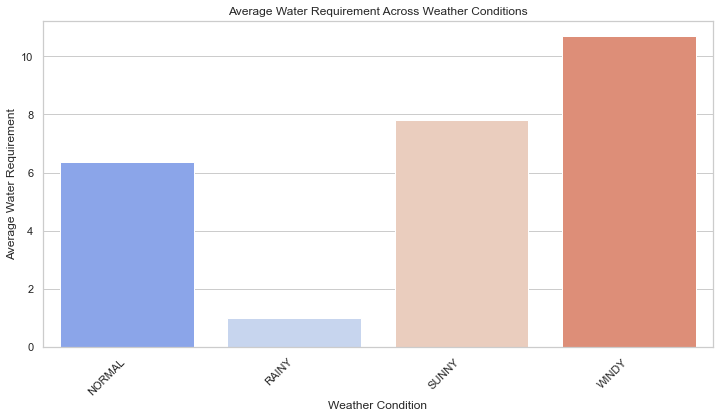

In [6]:
# Calculate the average water requirement for each weather condition
average_water_requirement_weather = df.groupby('WEATHER_CONDITION')['WATER_REQUIREMENT'].mean().reset_index()

# Visualization: Bar plot for average WATER_REQUIREMENT based on WEATHER_CONDITION
plt.figure(figsize=(12, 6))
sns.barplot(x="WEATHER_CONDITION", y="WATER_REQUIREMENT", data=average_water_requirement_weather, palette="coolwarm")
plt.title("Average Water Requirement Across Weather Conditions")
plt.xlabel("Weather Condition")
plt.ylabel("Average Water Requirement")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()


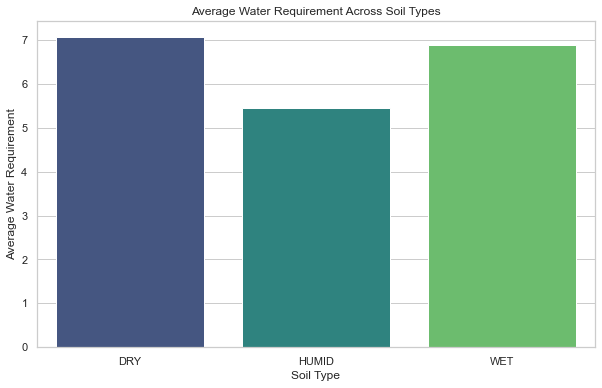

In [7]:
# Calculate the average water requirement for each soil type
average_water_requirement_soil = df.groupby('SOIL_TYPE')['WATER_REQUIREMENT'].mean().reset_index()

# Visualization: Bar plot for average WATER_REQUIREMENT based on SOIL_TYPE
plt.figure(figsize=(10, 6))
sns.barplot(x="SOIL_TYPE", y="WATER_REQUIREMENT", data=average_water_requirement_soil, palette="viridis")
plt.title("Average Water Requirement Across Soil Types")
plt.xlabel("Soil Type")
plt.ylabel("Average Water Requirement")
plt.show()


In [8]:
#handling missing data
print(df.isnull().sum())

print("\n",df.dtypes,"\n")

CROP_TYPE            0
SOIL_TYPE            0
REGION               0
TEMPERATURE          0
WEATHER_CONDITION    0
WATER_REQUIREMENT    0
dtype: int64

 CROP_TYPE             object
SOIL_TYPE             object
REGION                object
TEMPERATURE           object
WEATHER_CONDITION     object
WATER_REQUIREMENT    float64
dtype: object 



In [9]:


#label encoding
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
df['CROP_TYPE'] = LE.fit_transform(df.CROP_TYPE)
st = LE.classes_
print(sorted(st))
df['SOIL_TYPE'] = LE.fit_transform(df.SOIL_TYPE)
st = LE.classes_
print(sorted(st))
df['REGION'] = LE.fit_transform(df.REGION)
st = LE.classes_
print(sorted(st))
df['TEMPERATURE'] = LE.fit_transform(df.TEMPERATURE)
st = LE.classes_
print(sorted(st))
df['WEATHER_CONDITION'] = LE.fit_transform(df.WEATHER_CONDITION)
st = LE.classes_
print(sorted(st))

print("\n",df.dtypes,"\n")

df.head()

['BANANA', 'BEAN', 'CABBAGE', 'CITRUS', 'COTTON', 'MAIZE', 'MELON', 'MUSTARD', 'ONION', 'POTATO', 'RICE', 'SOYABEAN', 'SUGARCANE', 'TOMATO', 'WHEAT']
['DRY', 'HUMID', 'WET']
['DESERT', 'HUMID', 'SEMI ARID', 'SEMI HUMID']
['20-30', '30-40', '40-50', 'Oct-20']
['NORMAL', 'RAINY', 'SUNNY', 'WINDY']

 CROP_TYPE              int32
SOIL_TYPE              int32
REGION                 int32
TEMPERATURE            int32
WEATHER_CONDITION      int32
WATER_REQUIREMENT    float64
dtype: object 



,CROP_TYPE,SOIL_TYPE,REGION,TEMPERATURE,WEATHER_CONDITION,WATER_REQUIREMENT
0,0,0,0,3,0,8.75
1,0,0,0,3,2,10.25
2,0,0,0,3,3,9.65
3,0,0,0,3,1,0.75
4,0,0,0,0,0,9.85


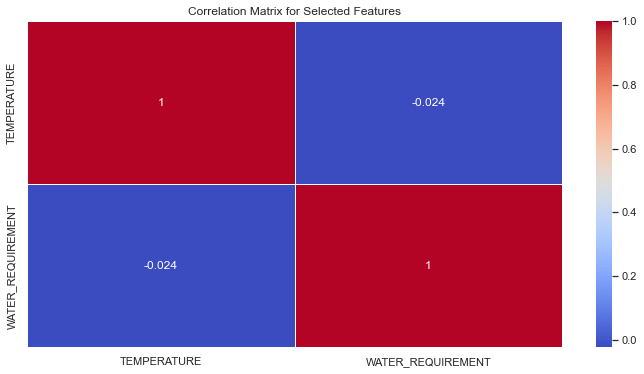

In [10]:
# Select relevant features for correlation analysis
selected_features = ['TEMPERATURE', 'WATER_REQUIREMENT']

# Create a subset of the DataFrame with selected features
subset_df = df[selected_features]

# Plot correlation matrix for the selected features
plt.figure(figsize=(12, 6))
sns.heatmap(subset_df.corr(), annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix for Selected Features')
plt.show()


In [11]:
#seperate into independent and dependent variables
x = df.iloc[:,:-1]
y = df.loc[:,'WATER_REQUIREMENT']

#train test split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)

x.head()

,CROP_TYPE,SOIL_TYPE,REGION,TEMPERATURE,WEATHER_CONDITION
0,0,0,0,3,0
1,0,0,0,3,2
2,0,0,0,3,3
3,0,0,0,3,1
4,0,0,0,0,0


In [12]:
#importing random forest
model = RandomForestRegressor()

#model training
model.fit(x_train,y_train)
y_pred_rf = model.predict(x_test)

#RMS Score method for accuracy
from sklearn.metrics import r2_score
r1 = r2_score(y_test,y_pred_rf)
print("R2 score :",r1*100)


from sklearn.metrics import mean_squared_error
# Assuming y_true and y_pred are your true and predicted values, respectively
mse = mean_squared_error(y_test, y_pred_rf)
print(f'Mean Squared Error: {mse}')


from sklearn.metrics import mean_absolute_error
# Assuming y_true and y_pred are your true and predicted values, respectively
mae = mean_absolute_error(y_test, y_pred_rf)
print(f'Mean Absolute Error: {mae}')

from sklearn.metrics import explained_variance_score
evs = explained_variance_score(y_test, y_pred_rf)
print(f'Explained Variance Score: {evs}')

from sklearn.metrics import max_error
me = max_error(y_test, y_pred_rf)
print(f'Max Error: {me}')

from sklearn.metrics import median_absolute_error
mae = median_absolute_error(y_test, y_pred_rf)
print(f'Median Absolute Error: {mae}')



R2 score : 95.89623397103124
Mean Squared Error: 10.873174444060394
Mean Absolute Error: 0.5078145169201943
Explained Variance Score: 0.9590515601427284
Max Error: 82.75419999999997
Median Absolute Error: 0.17409999999999703


In [13]:
#accuracy
print("model score:",model.score(x_test,y_test)*100)

model score: 95.89623397103124


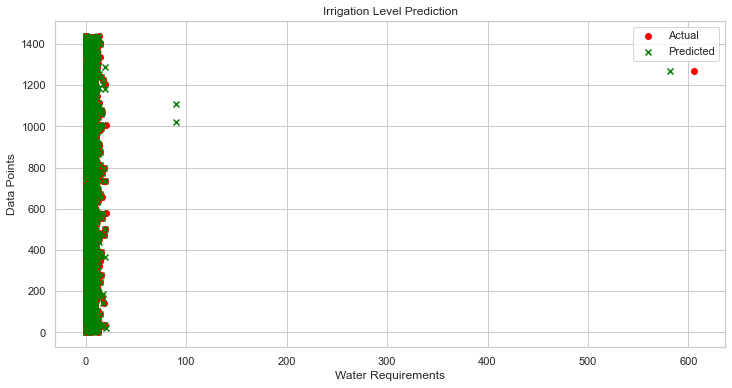

In [14]:
import matplotlib.pyplot as plt
# Scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(y_test, range(len(y_test)), color='red', label="Actual", marker='o')
plt.scatter(y_pred_rf, range(len(y_pred_rf)), color='green', label="Predicted", marker='x')
plt.title("Irrigation Level Prediction")
plt.xlabel("Water Requirements")
plt.ylabel("Data Points")
plt.legend(['Actual', 'Predicted'], loc="upper right")
plt.show()

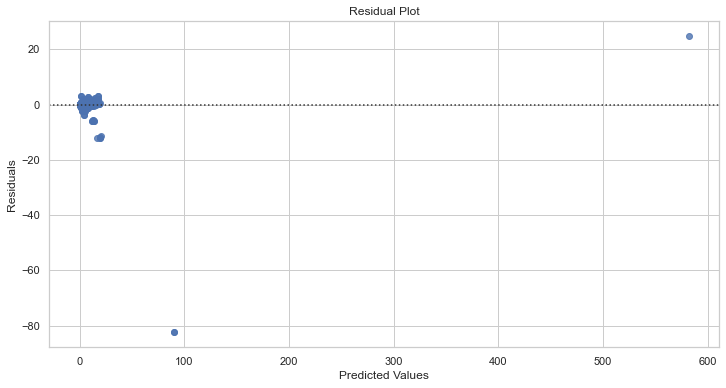

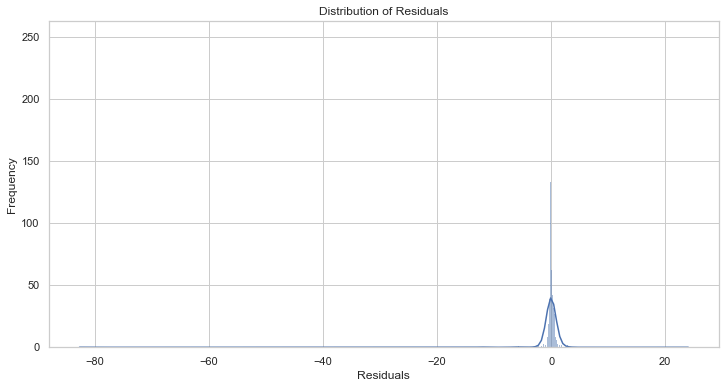

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Residual plot
plt.figure(figsize=(12, 6))
sns.residplot(x=y_pred_rf, y=y_test - y_pred_rf)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

# Distribution plot
plt.figure(figsize=(12, 6))
sns.histplot(y_test - y_pred_rf, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()


In [16]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso
from xgboost import XGBRegressor
from sklearn.svm import SVR
import lightgbm as lgb
from catboost import CatBoostRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, explained_variance_score, max_error, mean_squared_log_error, median_absolute_error

# List of regression models
models = [
    RandomForestRegressor(),
    GradientBoostingRegressor(),
    XGBRegressor(),
    SVR(),
    Lasso(),
    AdaBoostRegressor(),
    DecisionTreeRegressor(),
    CatBoostRegressor(silent=True),
    lgb.LGBMRegressor(),
    
]

# Train and evaluate each model
for model in models:
    # Train the model
    model.fit(x_train, y_train)
    
    # Make predictions
    y_pred = model.predict(x_test)
    
    # Print evaluation metrics
    print(f"\n{type(model).__name__} Evaluation:")
    print("R2 Score:", r2_score(y_test, y_pred))
    print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
    print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
    print("Explained Variance Score:", explained_variance_score(y_test, y_pred))
    print("Max Error:", max_error(y_test, y_pred))
    print("Median Absolute Error:", median_absolute_error(y_test, y_pred))



RandomForestRegressor Evaluation:
R2 Score: 0.9753120344890094
Mean Squared Error: 6.541224664735651
Mean Absolute Error: 0.4706757094631835
Explained Variance Score: 0.9753292581037157
Max Error: 66.00210000000004
Median Absolute Error: 0.17400000000000482

GradientBoostingRegressor Evaluation:
R2 Score: 0.11425489200628602
Mean Squared Error: 234.68348351742947
Mean Absolute Error: 3.051484653476137
Explained Variance Score: 0.11524418643606127
Max Error: 550.3581300445288
Median Absolute Error: 1.3691918145633561

XGBRegressor Evaluation:
R2 Score: 0.6187735630532194
Mean Squared Error: 101.00823298280423
Mean Absolute Error: 2.645112347085417
Explained Variance Score: 0.6189500297458395
Max Error: 171.07504577636718
Median Absolute Error: 0.5927534484863282

SVR Evaluation:
R2 Score: 0.014037884049514893
Mean Squared Error: 261.2365813812857
Mean Absolute Error: 2.943275008907937
Explained Variance Score: 0.014083669782146813
Max Error: 600.4498161315723
Median Absolute Error: 1.8

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000168 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 30
[LightGBM] [Info] Number of data points in the train set: 4320, number of used features: 5
[LightGBM] [Info] Start training from score 6.608949


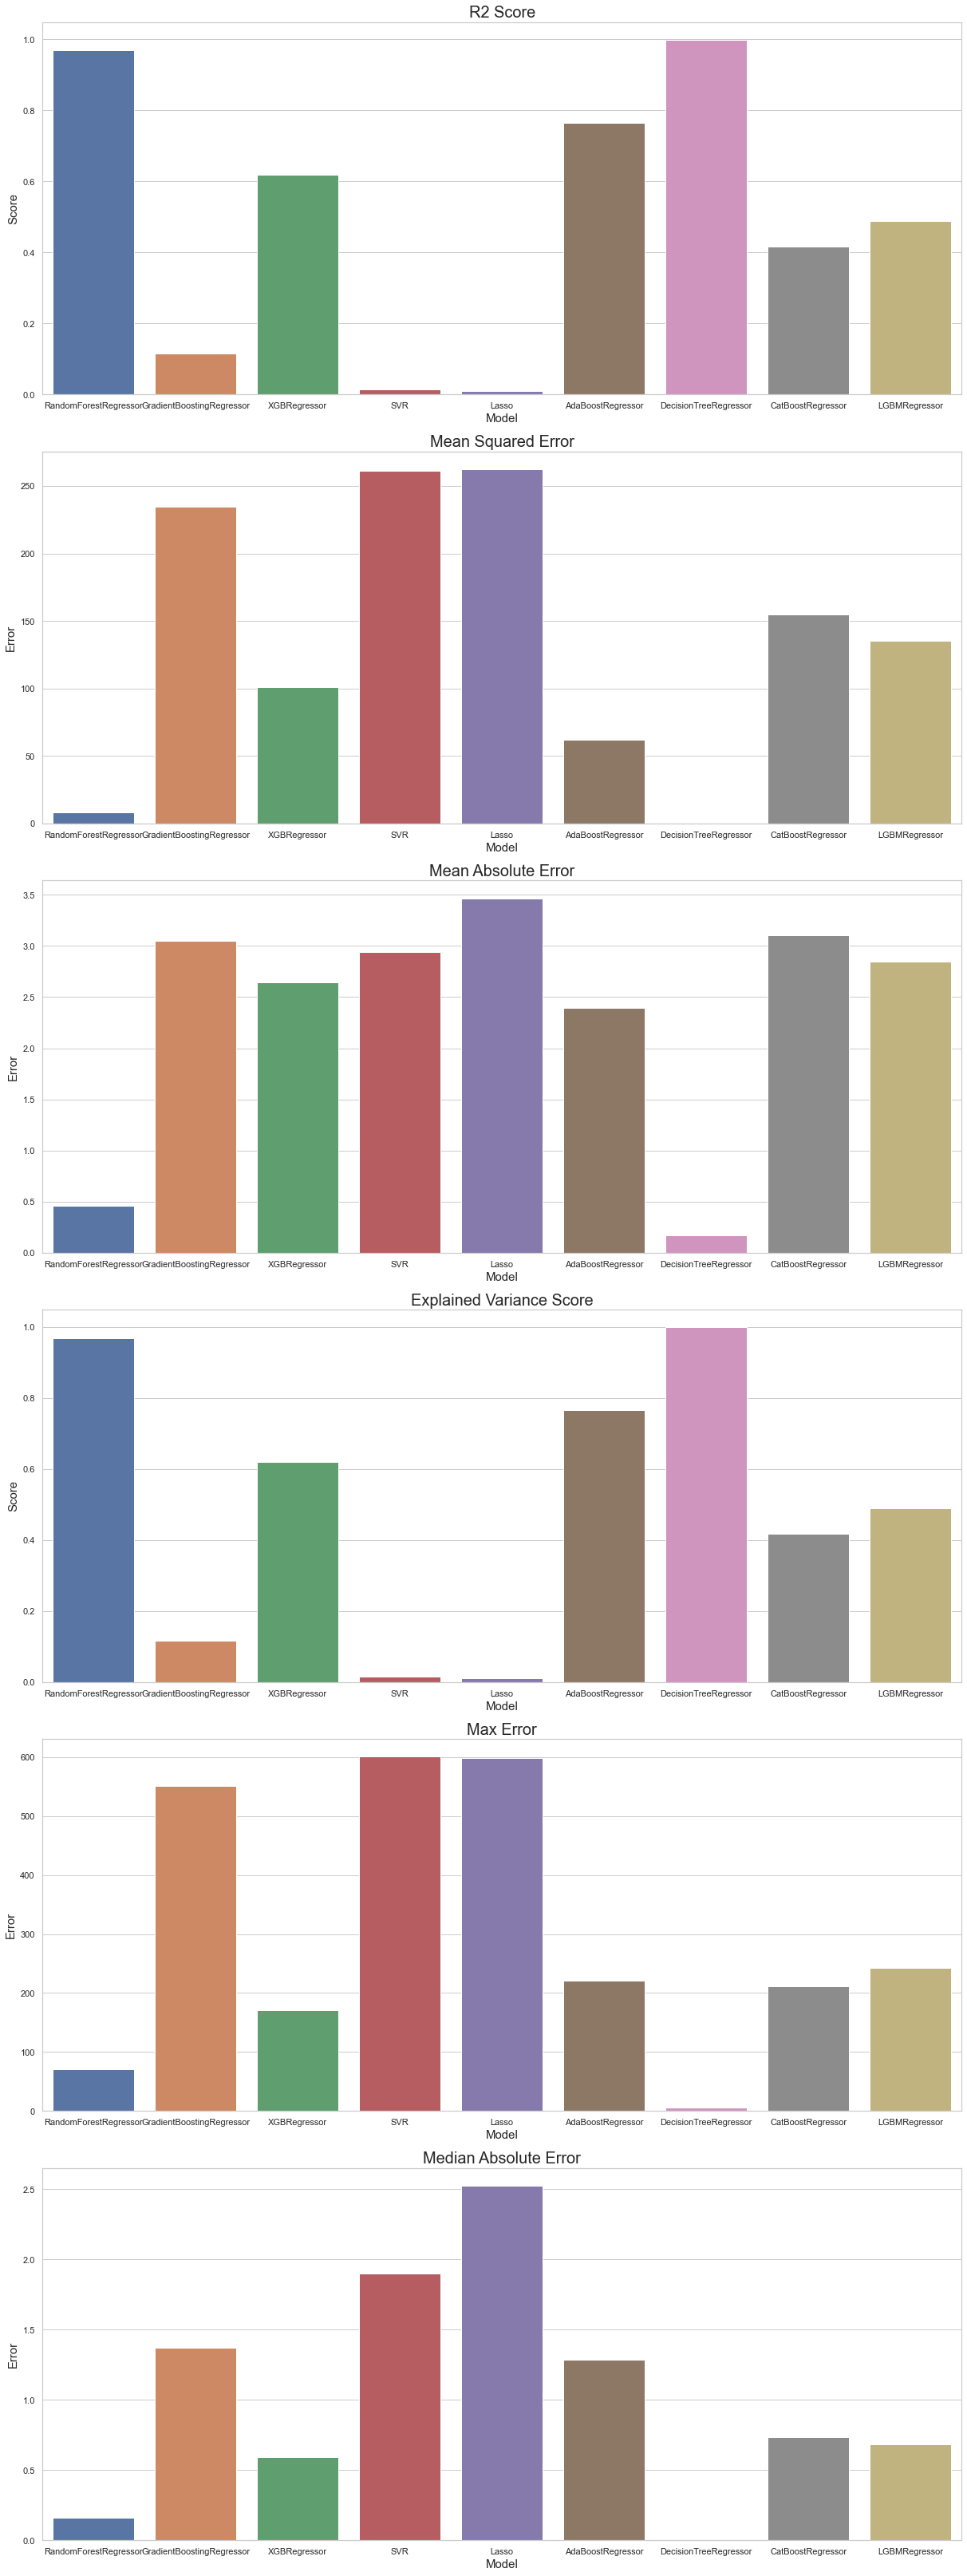

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# List of regression models
models = [
    RandomForestRegressor(),
    GradientBoostingRegressor(),
    XGBRegressor(),
    SVR(),
    Lasso(),
    AdaBoostRegressor(),
    DecisionTreeRegressor(),
    CatBoostRegressor(silent=True),
    lgb.LGBMRegressor(),
]

# Create empty lists to store metrics for visualization
model_names = []
r2_scores = []
mse_scores = []
mae_scores = []
evs_scores = []
max_errors = []
median_abs_errors = []

# Train and evaluate each model
for model in models:
    # Train the model
    model.fit(x_train, y_train)
    
    # Make predictions
    y_pred = model.predict(x_test)
    
    # Store model name
    model_names.append(type(model).__name__)
    
    # Store evaluation metrics
    r2_scores.append(r2_score(y_test, y_pred))
    mse_scores.append(mean_squared_error(y_test, y_pred))
    mae_scores.append(mean_absolute_error(y_test, y_pred))
    evs_scores.append(explained_variance_score(y_test, y_pred))
    max_errors.append(max_error(y_test, y_pred))
    median_abs_errors.append(median_absolute_error(y_test, y_pred))

# Create a DataFrame for visualization
metrics_df = pd.DataFrame({
    'Model': model_names,
    'R2 Score': r2_scores,
    'Mean Squared Error': mse_scores,
    'Mean Absolute Error': mae_scores,
    'Explained Variance Score': evs_scores,
    'Max Error': max_errors,
    'Median Absolute Error': median_abs_errors
})

# Plot the metrics
plt.figure(figsize=(17, 45))

# R2 Score
plt.subplot(6, 1, 1)
sns.barplot(x='Model', y='R2 Score', data=metrics_df)
plt.title('R2 Score', fontsize=20)
plt.xlabel('Model', fontsize=15)
plt.ylabel('Score', fontsize=15)

# Mean Squared Error
plt.subplot(6, 1, 2)
sns.barplot(x='Model', y='Mean Squared Error', data=metrics_df)
plt.title('Mean Squared Error', fontsize=20)
plt.xlabel('Model', fontsize=15)
plt.ylabel('Error', fontsize=15)

# Mean Absolute Error
plt.subplot(6, 1, 3)
sns.barplot(x='Model', y='Mean Absolute Error', data=metrics_df)
plt.title('Mean Absolute Error', fontsize=20)
plt.xlabel('Model', fontsize=15)
plt.ylabel('Error', fontsize=15)

# Explained Variance Score
plt.subplot(6, 1, 4)
sns.barplot(x='Model', y='Explained Variance Score', data=metrics_df)
plt.title('Explained Variance Score', fontsize=20)
plt.xlabel('Model', fontsize=15)
plt.ylabel('Score', fontsize=15)

# Max Error
plt.subplot(6, 1, 5)
sns.barplot(x='Model', y='Max Error', data=metrics_df)
plt.title('Max Error', fontsize=20)
plt.xlabel('Model', fontsize=15)
plt.ylabel('Error', fontsize=15)

# Median Absolute Error
plt.subplot(6, 1, 6)
sns.barplot(x='Model', y='Median Absolute Error', data=metrics_df)
plt.title('Median Absolute Error', fontsize=20)
plt.xlabel('Model', fontsize=15)
plt.ylabel('Error', fontsize=15)

plt.tight_layout()
plt.show()


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000130 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 30
[LightGBM] [Info] Number of data points in the train set: 4320, number of used features: 5
[LightGBM] [Info] Start training from score 6.608949


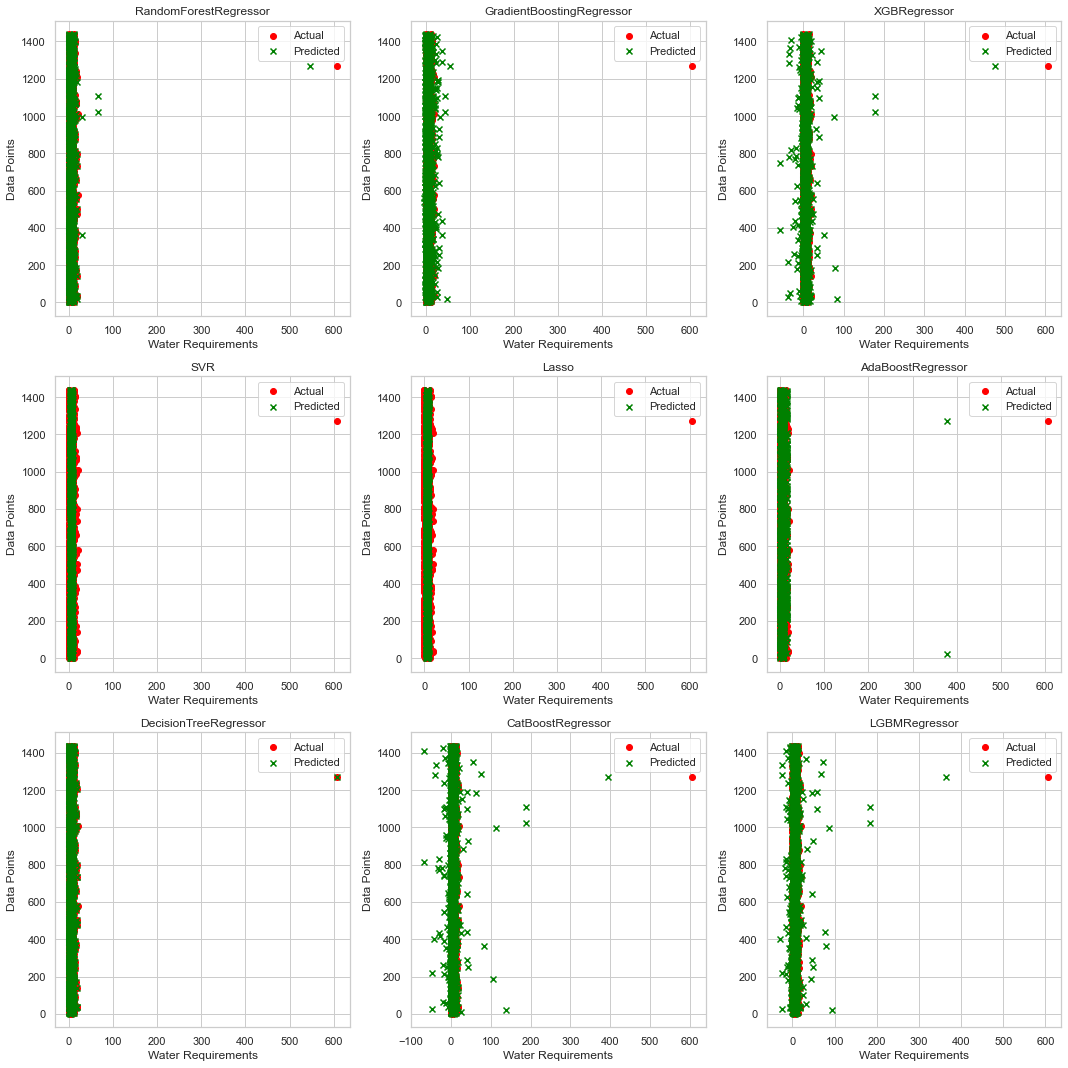

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# List of regression models
models = [
    RandomForestRegressor(),
    GradientBoostingRegressor(),
    XGBRegressor(),
    SVR(),
    Lasso(),
    AdaBoostRegressor(),
    DecisionTreeRegressor(),
    CatBoostRegressor(silent=True),
    lgb.LGBMRegressor(),
]

# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))

# Flatten the axes for iteration
axes = axes.flatten()

# Train and evaluate each model
for ax, model in zip(axes, models):
    # Train the model
    model.fit(x_train, y_train)
    
    # Make predictions
    y_pred = model.predict(x_test)
    
    # Scatter plot for actual values
    ax.scatter(y_test, range(len(y_test)), color='red', label="Actual", marker='o')
    
    # Scatter plot for predicted values
    ax.scatter(y_pred, range(len(y_pred)), color='green', label="Predicted", marker='x')
    
    # Set plot labels and title
    ax.set_title(type(model).__name__)
    ax.set_xlabel("Water Requirements")
    ax.set_ylabel("Data Points")
    ax.legend(['Actual', 'Predicted'], loc="upper right")

# Adjust layout
plt.tight_layout()
plt.show()


<a id="setup"></a>
# <p style="background-color: #2E8B57; font-family:calibri; color:white; font-size:140%; font-family:Verdana; text-align:center; border-radius:15px 50px;">II. Fertilizer Recommendation</p>

<a id="libraries"></a>
# <b><span style='color: #4CBB17' >Step 1.1 |</span><span style='color: #088F8F'> Importing Necessary Libraries</span></b>

In [19]:
#Data Preprocessing
#importing the libraries
import numpy as np
import pandas as pd
import pickle

#load the dataset
df2 = pd.read_csv('Fertilizer_Prediction.csv')

print(df2.dtypes)

df2.head()

Temparature         int64
Humidity            int64
Moisture            int64
Soil_Type          object
Crop_Type          object
Nitrogen            int64
Potassium           int64
Phosphorous         int64
Fertilizer_Name    object
dtype: object


,Temparature,Humidity,Moisture,Soil_Type,Crop_Type,Nitrogen,Potassium,Phosphorous,Fertilizer_Name
0,26,52,38,Sandy,Maize,37,0,0,Urea
1,29,52,45,Loamy,Sugarcane,12,0,36,DAP
2,34,65,62,Black,Cotton,7,9,30,14-35-14
3,32,62,34,Red,Tobacco,22,0,20,28-28
4,28,54,46,Clayey,Paddy,35,0,0,Urea


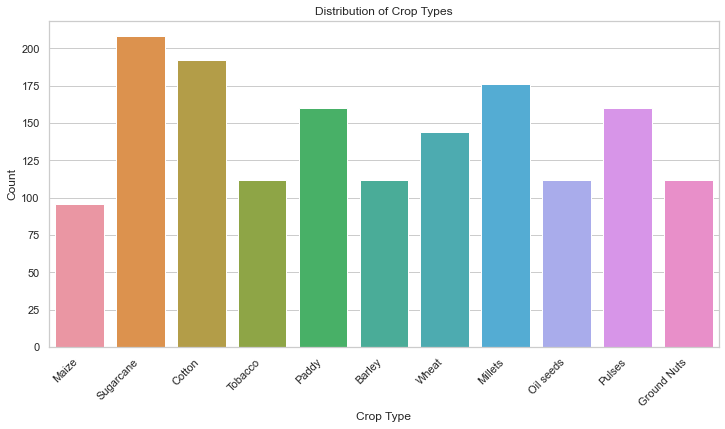

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar graph for Crop Types
plt.figure(figsize=(12, 6))
sns.countplot(x='Crop_Type', data=df2)
plt.title('Distribution of Crop Types')
plt.xlabel('Crop Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()


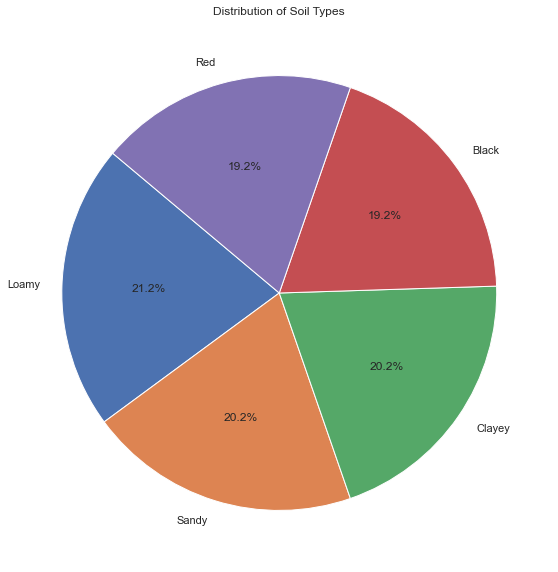

In [21]:
# Pie chart for Soil Types
plt.figure(figsize=(12, 10))
soil_type_counts = df2['Soil_Type'].value_counts()
plt.pie(soil_type_counts, labels=soil_type_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Soil Types')
plt.show()


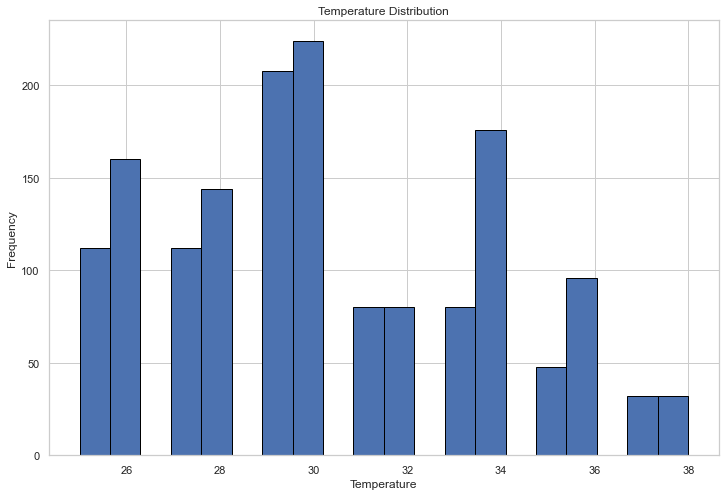

In [22]:
# Histogram for Temperature
plt.figure(figsize=(12, 8))
plt.hist(df2['Temparature'], bins=20, edgecolor='black')
plt.title('Temperature Distribution')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()


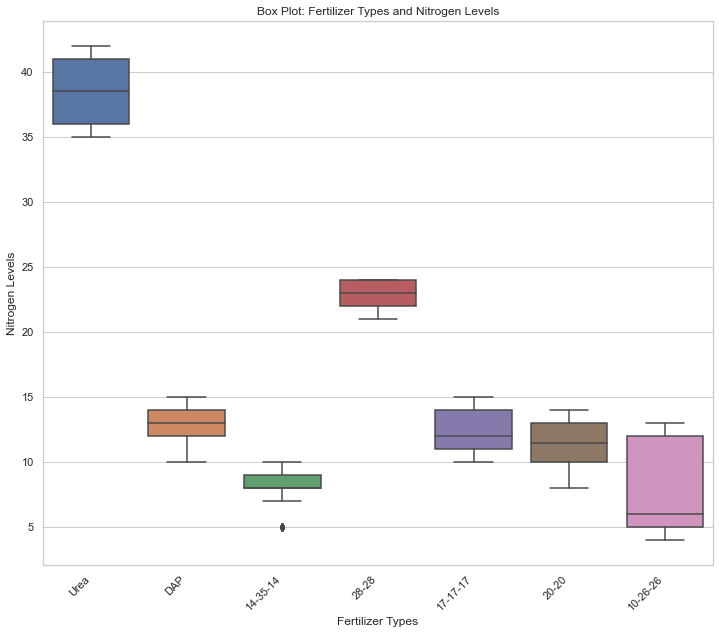

In [23]:
# Box plot for Fertilizer Types and Nitrogen Levels
plt.figure(figsize=(12, 10))
sns.boxplot(x='Fertilizer_Name', y='Nitrogen', data=df2)
plt.title('Box Plot: Fertilizer Types and Nitrogen Levels')
plt.xlabel('Fertilizer Types')
plt.ylabel('Nitrogen Levels')
plt.xticks(rotation=45, ha='right')
plt.show()


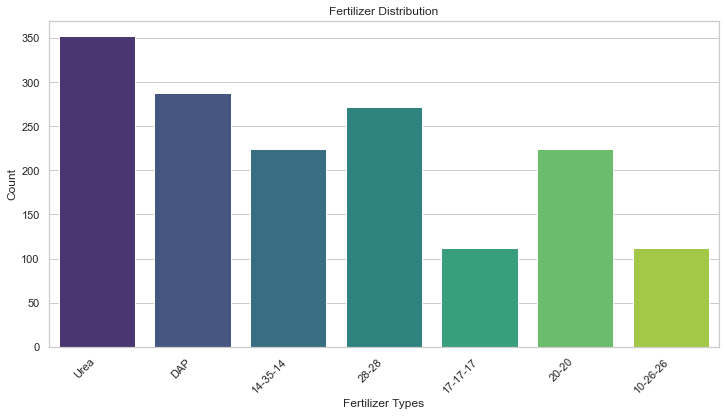

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Countplot for Fertilizer distribution
plt.figure(figsize=(12, 6))
sns.countplot(x='Fertilizer_Name', data=df2, palette='viridis')
plt.title('Fertilizer Distribution')
plt.xlabel('Fertilizer Types')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()


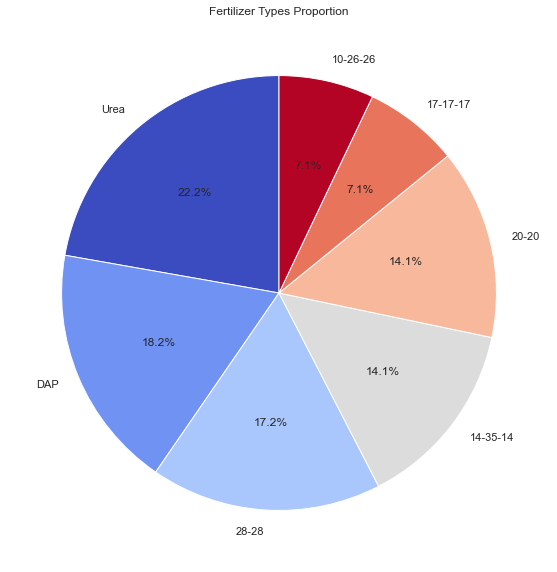

In [25]:
# Pie chart for Fertilizer Types Proportion
plt.figure(figsize=(12, 10))
df2['Fertilizer_Name'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, cmap='coolwarm')
plt.title('Fertilizer Types Proportion')
plt.ylabel('')
plt.show()


In [26]:
print(df2.isnull().sum())

Temparature        0
Humidity           0
Moisture           0
Soil_Type          0
Crop_Type          0
Nitrogen           0
Potassium          0
Phosphorous        0
Fertilizer_Name    0
dtype: int64


In [27]:
#label encoding 
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
df2['Soil_Type'] = LE.fit_transform(df2.Soil_Type)
st = LE.classes_
print(sorted(st))
df2['Crop_Type'] = LE.fit_transform(df2.Crop_Type)
ct = LE.classes_
print(sorted(ct))

df2.head()

['Black', 'Clayey', 'Loamy', 'Red', 'Sandy']
['Barley', 'Cotton', 'Ground Nuts', 'Maize', 'Millets', 'Oil seeds', 'Paddy', 'Pulses', 'Sugarcane', 'Tobacco', 'Wheat']


,Temparature,Humidity,Moisture,Soil_Type,Crop_Type,Nitrogen,Potassium,Phosphorous,Fertilizer_Name
0,26,52,38,4,3,37,0,0,Urea
1,29,52,45,2,8,12,0,36,DAP
2,34,65,62,0,1,7,9,30,14-35-14
3,32,62,34,3,9,22,0,20,28-28
4,28,54,46,1,6,35,0,0,Urea


In [28]:
#divide into dependent and independent variables
x = df2.iloc[:,:-1]
y = df2.iloc[:,-1]

#dividing into training and testing the data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)

x.head()

,Temparature,Humidity,Moisture,Soil_Type,Crop_Type,Nitrogen,Potassium,Phosphorous
0,26,52,38,4,3,37,0,0
1,29,52,45,2,8,12,0,36
2,34,65,62,0,1,7,9,30
3,32,62,34,3,9,22,0,20
4,28,54,46,1,6,35,0,0


In [29]:
#model creation
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

#training the model
model.fit(x_train,y_train)

RandomForestClassifier()

In [30]:
#testing the model
y_pred = model.predict(x_test)
#print(y_pred)

#accuracy
from sklearn.metrics import accuracy_score
print("Accuracy score:",accuracy_score(y_test, y_pred)*100)

from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
print(f'Precision: {precision}, Recall: {recall}, F1-Score: {f1}')


# Evaluate the model
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Accuracy score: 100.0
Precision: 1.0, Recall: 1.0, F1-Score: 1.0
Classification Report:
               precision    recall  f1-score   support

    10-26-26       1.00      1.00      1.00        28
    14-35-14       1.00      1.00      1.00        56
    17-17-17       1.00      1.00      1.00        23
       20-20       1.00      1.00      1.00        60
       28-28       1.00      1.00      1.00        72
         DAP       1.00      1.00      1.00        67
        Urea       1.00      1.00      1.00        90

    accuracy                           1.00       396
   macro avg       1.00      1.00      1.00       396
weighted avg       1.00      1.00      1.00       396



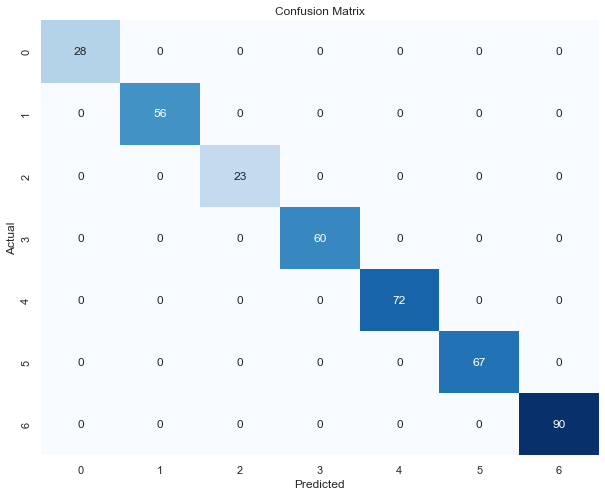

In [31]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


ROC AUC Score: 1.0


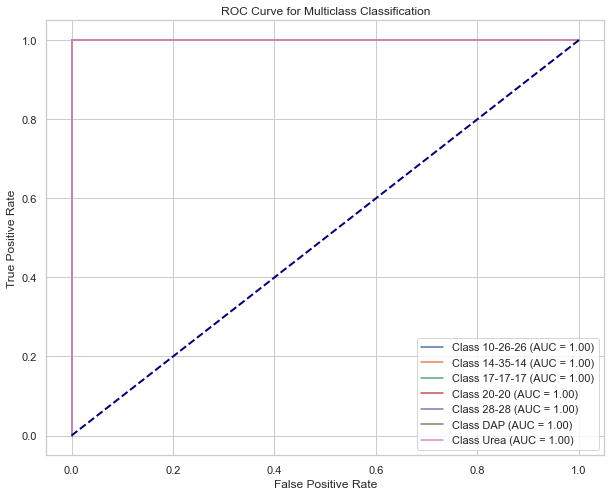

In [32]:
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize

# Binarize the labels
y_test_bin = label_binarize(y_test, classes=model.classes_)

# Get the predicted probabilities
y_probs = model.predict_proba(x_test)

# Calculate the ROC AUC score
roc_auc = roc_auc_score(y_test_bin, y_probs, average='macro')

# Print ROC AUC score
print(f'ROC AUC Score: {roc_auc}')

# Plot ROC curve for each class
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Plot ROC curve for each class
plt.figure(figsize=(10, 8))
for i in range(len(model.classes_)):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_probs[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {model.classes_[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multiclass Classification')
plt.legend(loc='lower right')
plt.show()


<a id="setup"></a>
# <p style="background-color: #2E8B57; font-family:calibri; color:white; font-size:140%; font-family:Verdana; text-align:center; border-radius:15px 50px;">III. Crop Yeild Prediction</p>

In [33]:
#Data Preprocessing
#importing the libraries
import numpy as np
import pandas as pd

#load the dataset
df3 = pd.read_csv('crop_yeild.csv')

print(df3.dtypes)
df3.head()

Season         object
Crop           object
Area          float64
Production    float64
dtype: object


,Season,Crop,Area,Production
0,Kharif,Arecanut,1254.0,2000.0
1,Kharif,Other Kharif pulses,2.0,1.0
2,Kharif,Rice,102.0,321.0
3,Whole Year,Banana,176.0,641.0
4,Whole Year,Cashewnut,720.0,165.0


In [34]:
#handling missing data
print(df3.isnull().sum())
df3.dropna(inplace=True)
print(df3.isnull().sum())

Season          0
Crop            0
Area            0
Production    146
dtype: int64
Season        0
Crop          0
Area          0
Production    0
dtype: int64


In [35]:
#label encoding
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
df3['Season'] = LE.fit_transform(df3.Season)
s = LE.classes_
print(sorted(s))
df3['Crop'] = LE.fit_transform(df3.Crop)
c = LE.classes_
print(sorted(c))

df3.head()

['Autumn     ', 'Kharif     ', 'Rabi       ', 'Summer     ', 'Whole Year ', 'Winter     ']
['Arecanut', 'Arhar/Tur', 'Bajra', 'Banana', 'Beans & Mutter(Vegetable)', 'Bhindi', 'Black pepper', 'Blackgram', 'Bottle Gourd', 'Brinjal', 'Cabbage', 'Cashewnut', 'Castor seed', 'Citrus Fruit', 'Coconut ', 'Coriander', 'Cotton(lint)', 'Cowpea(Lobia)', 'Cucumber', 'Dry chillies', 'Dry ginger', 'Garlic', 'Ginger', 'Gram', 'Grapes', 'Groundnut', 'Horse-gram', 'Jowar', 'Jute', 'Korra', 'Lemon', 'Linseed', 'Maize', 'Mango', 'Masoor', 'Mesta', 'Moong(Green Gram)', 'Niger seed', 'Oilseeds total', 'Onion', 'Orange', 'Other  Rabi pulses', 'Other Fresh Fruits', 'Other Kharif pulses', 'Other Vegetables', 'Paddy', 'Papaya', 'Peas  (vegetable)', 'Peas & beans (Pulses)', 'Pineapple', 'Pome Fruit', 'Pome Granet', 'Potato', 'Pulses total', 'Ragi', 'Rapeseed &Mustard', 'Rice', 'Safflower', 'Samai', 'Sapota', 'Sesamum', 'Small millets', 'Soyabean', 'Sugarcane', 'Sunflower', 'Sweet potato', 'Tapioca', 'Tobacco', '

,Season,Crop,Area,Production
0,1,0,1254.0,2000.0
1,1,43,2.0,1.0
2,1,56,102.0,321.0
3,4,3,176.0,641.0
4,4,11,720.0,165.0


In [36]:
#seperate into independent and dependent variables
#print(dataset.columns)
x = df3.iloc[:,:-1]
y = df3.iloc[:,-1]

#dividing into train and test data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)

print(x_train.shape)
y_train.shape

(29890, 3)


(29890,)

In [37]:
#importing random forest
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()

#model training
model.fit(x_train,y_train)
y_pred_rf = model.predict(x_test)

#accuracy
print("model score:",model.score(x_test,y_test)*100)

#RMS Score method for accuracy
from sklearn.metrics import r2_score
r1 = r2_score(y_test,y_pred_rf)
print("R2 score :",r1*100)

from sklearn.metrics import mean_squared_error
# Assuming y_true and y_pred are your true and predicted values, respectively
mse = mean_squared_error(y_test, y_pred_rf)
print(f'Mean Squared Error: {mse}')


from sklearn.metrics import mean_absolute_error
# Assuming y_true and y_pred are your true and predicted values, respectively
mae = mean_absolute_error(y_test, y_pred_rf)
print(f'Mean Absolute Error: {mae}')

from sklearn.metrics import explained_variance_score
evs = explained_variance_score(y_test, y_pred_rf)
print(f'Explained Variance Score: {evs}')

from sklearn.metrics import max_error
me = max_error(y_test, y_pred_rf)
print(f'Max Error: {me}')

from sklearn.metrics import median_absolute_error
mae = median_absolute_error(y_test, y_pred_rf)
print(f'Median Absolute Error: {mae}')

model score: 98.89224706491127
R2 score : 98.89224706491127
Mean Squared Error: 3942960163836.9
Mean Absolute Error: 96475.47615118962
Explained Variance Score: 0.9889225168752592
Max Error: 112791185.51999998
Median Absolute Error: 132.78500000000037


In [38]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso
from xgboost import XGBRegressor
from sklearn.svm import SVR
import lightgbm as lgb
from catboost import CatBoostRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, explained_variance_score, max_error, mean_squared_log_error, median_absolute_error

# List of regression models
models = [
    RandomForestRegressor(),
    GradientBoostingRegressor(),
    XGBRegressor(),
    #SVR(),
    Lasso(),
    AdaBoostRegressor(),
    DecisionTreeRegressor(),
    CatBoostRegressor(silent=True),
    lgb.LGBMRegressor(),
]

# Train and evaluate each model
for model in models:
    # Train the model
    model.fit(x_train, y_train)
    
    # Make predictions
    y_pred = model.predict(x_test)
    
    # Print evaluation metrics
    print(f"\n{type(model).__name__} Evaluation:")
    print("R2 Score:", r2_score(y_test, y_pred))
    print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
    print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
    print("Explained Variance Score:", explained_variance_score(y_test, y_pred))
    print("Max Error:", max_error(y_test, y_pred))
    print("Median Absolute Error:", median_absolute_error(y_test, y_pred))



RandomForestRegressor Evaluation:
R2 Score: 0.9879338695099256
Mean Squared Error: 4294845027895.2124
Mean Absolute Error: 101373.69625272766
Explained Variance Score: 0.9879340042072686
Max Error: 114538163.04000002
Median Absolute Error: 134.52999999999997

GradientBoostingRegressor Evaluation:
R2 Score: 0.963813787797503
Mean Squared Error: 12880199968340.988
Mean Absolute Error: 280392.2678085033
Explained Variance Score: 0.9638163080037025
Max Error: 181679832.47753915
Median Absolute Error: 4796.99014178027

XGBRegressor Evaluation:
R2 Score: 0.9401621167362458
Mean Squared Error: 21298827791271.723
Mean Absolute Error: 215238.1305869946
Explained Variance Score: 0.940166655430297
Max Error: 271343014.0
Median Absolute Error: 1728.30810546875

Lasso Evaluation:
R2 Score: 0.009117131993726879
Mean Squared Error: 352697027633175.56
Mean Absolute Error: 2392952.7856146023
Explained Variance Score: 0.009120008097756704
Max Error: 714851639.322682
Median Absolute Error: 1277088.20483

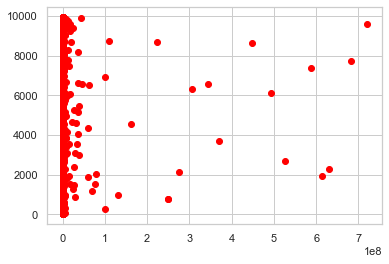

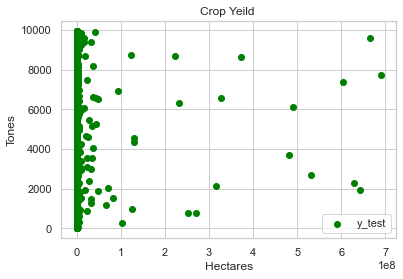

In [39]:
#data visualization
import matplotlib.pyplot as plt
plt.scatter(y_test,range(0,len(y_test)), color = "red")
plt.show()

plt.scatter(y_pred_rf,range(0,len(y_pred_rf)), color = 'green')
plt.title("Crop Yeild ")
plt.xlabel('Hectares')
plt.ylabel('Tones')
plt.legend(['y_test','y_pred'])
plt.show()


<a id="setup"></a>
# <p style="background-color: #2E8B57; font-family:calibri; color:white; font-size:140%; font-family:Verdana; text-align:center; border-radius:15px 50px;">IV. Crop Price Prediction</p>

In [40]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Load dataset (assuming 'crop_data.csv' as an example)
df4 = pd.read_csv('crop_price.csv')

print(df4.dtypes)

# Display the first few rows of the dataset
print("Original Dataset:")
df4.head()

SOIL_TYPE       object
N_SOIL           int64
P_SOIL           int64
K_SOIL           int64
TEMPERATURE    float64
HUMIDITY       float64
ph             float64
RAINFALL       float64
CROP_PRICE       int64
CROP            object
dtype: object
Original Dataset:


,SOIL_TYPE,N_SOIL,P_SOIL,K_SOIL,TEMPERATURE,HUMIDITY,ph,RAINFALL,CROP_PRICE,CROP
0,Sandy soil,90,42,43,20.879744,82.002744,6.502985,202.935536,7000,Amaranthus
1,Sandy soil,85,58,41,21.770462,80.319644,7.038096,226.655537,5000,Green Banana
2,Sandy soil,60,55,44,23.004459,82.320763,7.840207,263.964248,7000,Ladies Finger
3,Sandy soil,74,35,40,26.491096,80.158363,6.980401,242.864034,7000,Bitter Gourd
4,Sandy soil,78,42,42,20.130175,81.604873,7.628473,262.717340,120000,Black pepper


In [41]:
# Handle Missing Values (Fill NaN values with the mean of each column)
print(df4.isnull().sum())
#df.fillna(df.mean(), inplace=True)

SOIL_TYPE      0
N_SOIL         0
P_SOIL         0
K_SOIL         0
TEMPERATURE    0
HUMIDITY       0
ph             0
RAINFALL       0
CROP_PRICE     0
CROP           0
dtype: int64


In [42]:
# Encode Categorical Columns (Label Encoding for "STATE" and "SOIL_TYPE")
label_encoder = LabelEncoder()
df4['SOIL_TYPE'] = label_encoder.fit_transform(df4['SOIL_TYPE'])
df4['CROP'] = label_encoder.fit_transform(df4['CROP'])

# Handle Missing Values (Drop remaining rows with any NaN values)
df4.dropna(inplace=True)

df4.head()

,SOIL_TYPE,N_SOIL,P_SOIL,K_SOIL,TEMPERATURE,HUMIDITY,ph,RAINFALL,CROP_PRICE,CROP
0,14,90,42,43,20.879744,82.002744,6.502985,202.935536,7000,0
1,14,85,58,41,21.770462,80.319644,7.038096,226.655537,5000,54
2,14,60,55,44,23.004459,82.320763,7.840207,263.964248,7000,71
3,14,74,35,40,26.491096,80.158363,6.980401,242.864034,7000,13
4,14,78,42,42,20.130175,81.604873,7.628473,262.717340,120000,15


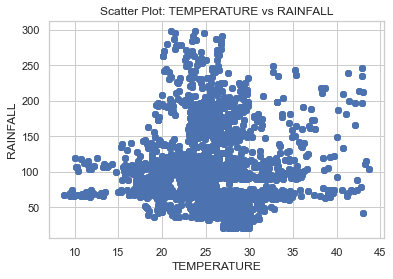

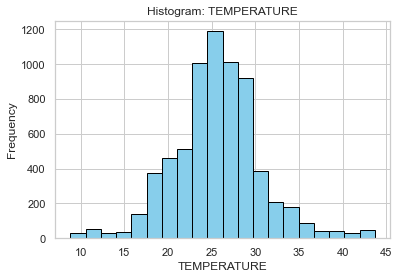

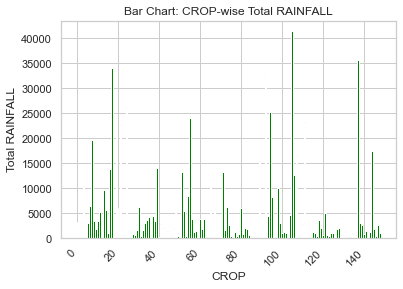

In [43]:
import matplotlib.pyplot as plt

# Scatter plot: TEMPERATURE vs RAINFALL
plt.scatter(df4['TEMPERATURE'], df4['RAINFALL'])
plt.title('Scatter Plot: TEMPERATURE vs RAINFALL')
plt.xlabel('TEMPERATURE')
plt.ylabel('RAINFALL')
plt.show()

# Histogram: TEMPERATURE
plt.hist(df4['TEMPERATURE'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram: TEMPERATURE')
plt.xlabel('TEMPERATURE')
plt.ylabel('Frequency')
plt.show()

# Bar chart: CROP-wise RAINFALL
crop_total_rainfall = df4.groupby('CROP')['RAINFALL'].sum()
plt.bar(crop_total_rainfall.index, crop_total_rainfall, color='green')
plt.title('Bar Chart: CROP-wise Total RAINFALL')
plt.xlabel('CROP')
plt.ylabel('Total RAINFALL')
plt.xticks(rotation=45, ha='right')
plt.show()


In [44]:
# Define features (X) and target variable (y)
x = df4.drop(columns=['CROP_PRICE'])  # Features
y = df4['CROP_PRICE']  # Target variable

# Split the data into training and testing sets (75% training, 25% testing)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

x.head()

,SOIL_TYPE,N_SOIL,P_SOIL,K_SOIL,TEMPERATURE,HUMIDITY,ph,RAINFALL,CROP
0,14,90,42,43,20.879744,82.002744,6.502985,202.935536,0
1,14,85,58,41,21.770462,80.319644,7.038096,226.655537,54
2,14,60,55,44,23.004459,82.320763,7.840207,263.964248,71
3,14,74,35,40,26.491096,80.158363,6.980401,242.864034,13
4,14,78,42,42,20.130175,81.604873,7.628473,262.717340,15


In [45]:
# Display the shapes of the resulting sets
print("Shapes of Training and Testing Sets:")
print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

Shapes of Training and Testing Sets:
x_train shape: (5100, 9)
x_test shape: (1700, 9)
y_train shape: (5100,)
y_test shape: (1700,)


In [46]:
#importing random forest
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()

#model training
model.fit(x_train,y_train)
y_pred_rf = model.predict(x_test)

#accuracy
print("model score:",model.score(x_test,y_test)*100)

#RMS Score method for accuracy
from sklearn.metrics import r2_score
r1 = r2_score(y_test,y_pred_rf)
print("R2 score :",r1*100)

from sklearn.metrics import mean_squared_error
# Assuming y_true and y_pred are your true and predicted values, respectively
mse = mean_squared_error(y_test, y_pred_rf)
print(f'Mean Squared Error: {mse}')


from sklearn.metrics import mean_absolute_error
# Assuming y_true and y_pred are your true and predicted values, respectively
mae = mean_absolute_error(y_test, y_pred_rf)
print(f'Mean Absolute Error: {mae}')

from sklearn.metrics import explained_variance_score
evs = explained_variance_score(y_test, y_pred_rf)
print(f'Explained Variance Score: {evs}')

from sklearn.metrics import max_error
me = max_error(y_test, y_pred_rf)
print(f'Max Error: {me}')

from sklearn.metrics import median_absolute_error
mae = median_absolute_error(y_test, y_pred_rf)
print(f'Median Absolute Error: {mae}')

model score: 88.60126372697687
R2 score : 88.60126372697687
Mean Squared Error: 801008.3663146473
Mean Absolute Error: 275.5991941176471
Explained Variance Score: 0.8860147367008223
Max Error: 17561.5
Median Absolute Error: 95.39999999999986


In [47]:
print("Shape of x_test:", x_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of x_test: (1700, 9)
Shape of y_test: (1700,)


In [48]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso
from xgboost import XGBRegressor
from sklearn.svm import SVR
import lightgbm as lgb
from catboost import CatBoostRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, explained_variance_score, max_error, mean_squared_log_error, median_absolute_error

# List of regression models
models = [
    RandomForestRegressor(),
    GradientBoostingRegressor(),
    XGBRegressor(),
    SVR(),
    Lasso(),
    AdaBoostRegressor(),
    DecisionTreeRegressor(),
    CatBoostRegressor(silent=True),
    lgb.LGBMRegressor(),
]

# Train and evaluate each model
for model in models:
    # Train the model
    model.fit(x_train, y_train)
    
    # Make predictions
    y_pred = model.predict(x_test)
    
    # Print evaluation metrics
    print(f"\n{type(model).__name__} Evaluation:")
    print("R2 Score:", r2_score(y_test, y_pred))
    print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
    print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
    print("Explained Variance Score:", explained_variance_score(y_test, y_pred))
    print("Max Error:", max_error(y_test, y_pred))
    print("Median Absolute Error:", median_absolute_error(y_test, y_pred))



RandomForestRegressor Evaluation:
R2 Score: 0.9020149174695272
Mean Squared Error: 688557.6523661765
Mean Absolute Error: 270.0582647058824
Explained Variance Score: 0.9020218685905814
Max Error: 16214.5
Median Absolute Error: 96.24000000000001

GradientBoostingRegressor Evaluation:
R2 Score: 0.6029411957550102
Mean Squared Error: 2790198.987863549
Mean Absolute Error: 1036.783114040309
Explained Variance Score: 0.602999722802334
Max Error: 15764.891191394483
Median Absolute Error: 657.0476854993641

XGBRegressor Evaluation:
R2 Score: 0.9070466164707408
Mean Squared Error: 653199.0573411493
Mean Absolute Error: 287.68292131641334
Explained Variance Score: 0.9071034901479205
Max Error: 16773.45703125
Median Absolute Error: 166.90460205078125

SVR Evaluation:
R2 Score: -0.07481367002858108
Mean Squared Error: 7552896.402733511
Mean Absolute Error: 1607.665947392401
Explained Variance Score: 0.004585819350484965
Max Error: 30704.93210318489
Median Absolute Error: 1070.9591095864002

Lass

<a id="setup"></a>
# <p style="background-color: #2E8B57; font-family:calibri; color:white; font-size:140%; font-family:Verdana; text-align:center; border-radius:15px 50px;">V. Mixed Crop Prediction</p>

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import plotly.graph_objects as go
import plotly.io as pio
from plotly.offline import iplot
import plotly.express as px

import itertools
from itertools import permutations

df5=pd.read_csv("mixed_crop.csv")
df5.head()

,N,P,K,temperature,humidity,ph,rainfall,label,crop
0,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee,roses
1,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee,roses
2,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee,roses
3,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee,roses
4,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee,roses


In [50]:
x = df5.iloc[:, :-2]
y = df5.iloc[:, [7,8]]

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

y.head()

,label,crop
0,coffee,roses
1,coffee,roses
2,coffee,roses
3,coffee,roses
4,coffee,roses


In [51]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df5['label']=LE.fit_transform(df5['label'])
c1 = LE.classes_
print(c1)
df5['crop']=LE.fit_transform(df5['crop'])
c2 = LE.classes_
print(c2)

['apple' 'banana' 'blackgram' 'chickpea' 'coconut' 'coffee' 'cotton'
 'grapes' 'jute' 'kidneybeans' 'lentil' 'maize' 'mango' 'mothbeans'
 'mungbean' 'muskmelon' 'orange' 'papaya' 'pigeonpeas' 'pomegranate'
 'rice' 'watermelon']
['banana' 'barley' 'beans' 'black gram' 'brinjal' 'cabbage' 'carrot'
 'cauliflower' 'cocoa' 'coconut' 'cotton' 'green gram' 'ground nut'
 'ground nuts' 'guava' 'lemon' 'litche' 'maize' 'mango' 'millets'
 'musturd' 'oilseeds' 'paddy' 'peanuts' 'peas' 'pepper' 'piegonpea'
 'pomogranate' 'pulses' 'raddish' 'rice' 'roses' 'sapota' 'sesame'
 'sorghum' 'soya beans' 'spanish' 'suger cane' 'wheat']


In [52]:
from sklearn.multioutput import MultiOutputClassifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)

classifier = MultiOutputClassifier(knn)
classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)

p = y_pred[: , 0]
q = y_pred[: , 1]
r = y_test['label']
s = y_test['crop']

import numpy as np
print( classifier.score(x_train,np.array(y_train)) * 100)

96.74509803921568



Metrics for Output Column 1:
Accuracy: 99.65%
Classification Report:
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        67
      banana       1.00      1.00      1.00        65
   blackgram       1.00      1.00      1.00        66
    chickpea       1.00      1.00      1.00        77
     coconut       1.00      1.00      1.00        84
      coffee       1.00      1.00      1.00        86
      cotton       1.00      1.00      1.00        76
      grapes       1.00      1.00      1.00        71
        jute       1.00      0.92      0.96        74
 kidneybeans       1.00      1.00      1.00        70
      lentil       1.00      1.00      1.00        84
       maize       1.00      1.00      1.00       102
       mango       1.00      1.00      1.00        69
   mothbeans       1.00      1.00      1.00        71
    mungbean       1.00      1.00      1.00        80
   muskmelon       1.00      1.00      1.00        66
      orang

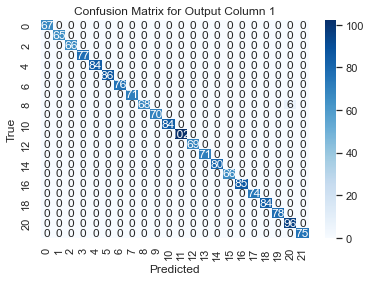


Metrics for Output Column 2:
Accuracy: 76.47%
Classification Report:
              precision    recall  f1-score   support

      banana       0.71      0.65      0.68        60
      barley       0.66      0.79      0.72        34
       beans       0.70      0.50      0.58        28
  black gram       0.84      0.90      0.87        91
     brinjal       0.79      0.90      0.84        69
     cabbage       0.92      0.79      0.85        91
      carrot       0.79      1.00      0.88        30
 cauliflower       0.78      0.90      0.84        60
       cocoa       0.45      0.83      0.59        12
     coconut       0.73      0.92      0.81        26
      cotton       0.94      0.85      0.89       104
  green gram       0.87      0.81      0.84        32
  ground nut       0.47      0.78      0.58        18
 ground nuts       0.78      0.78      0.78        40
       guava       1.00      0.59      0.74        22
       lemon       0.52      0.57      0.55        21
      litch

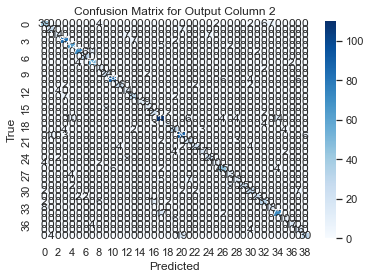

In [53]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

# Evaluation metrics for each output column
for i in range(y_test.shape[1]):
    print(f"\nMetrics for Output Column {i + 1}:")

    # Accuracy
    acc = accuracy_score(y_test.iloc[:, i], y_pred[:, i])
    print(f"Accuracy: {acc * 100:.2f}%")

    # Classification Report
    class_report = classification_report(y_test.iloc[:, i], y_pred[:, i])
    print(f"Classification Report:\n{class_report}")

    # Confusion Matrix
    print("Confusion Matrix:")
    sns.heatmap(confusion_matrix(y_test.iloc[:, i], y_pred[:, i]), annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix for Output Column {i + 1}')
    plt.show()


In [54]:
#For Mixed Crop Combination Prediction

import pandas as pd
import matplotlib.pyplot as plt
import pickle
import plotly.graph_objects as go
import plotly.io as pio
from plotly.offline import iplot
import plotly.express as px
import itertools
from itertools import permutations

df5=pd.read_csv("mixed_crop.csv")

from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df5['label']=LE.fit_transform(df5['label'])
df5['crop']=LE.fit_transform(df5['crop'])

x = df5.iloc[:, :-1]
y = df5.iloc[:, -1]

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

#model creation
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

#training the model
model.fit(x_train,y_train)

#testing the model
y_pred = model.predict(x_test)
#print(y_pred)

#accuracy
from sklearn.metrics import accuracy_score
print("Accuracy score:",accuracy_score(y_test, y_pred)*100)

from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
print(f'Precision: {precision}, \nRecall: {recall}, \nF1-Score: {f1}')


# Evaluate the model
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Accuracy score: 96.47058823529412
Precision: 0.96743194378601, 
Recall: 0.9647058823529412, 
F1-Score: 0.9646525147676587
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.95      0.97        60
           1       1.00      1.00      1.00        34
           2       1.00      0.79      0.88        28
           3       1.00      0.97      0.98        91
           4       0.96      1.00      0.98        69
           5       1.00      0.93      0.97        91
           6       0.90      0.90      0.90        30
           7       1.00      1.00      1.00        60
           8       1.00      1.00      1.00        12
           9       1.00      1.00      1.00        26
          10       0.97      1.00      0.99       104
          11       1.00      1.00      1.00        32
          12       1.00      1.00      1.00        18
          13       0.93      1.00      0.96        40
          14       1.00      0.86      0.93

<a id="setup"></a>
# <p style="background-color: #2E8B57; font-family:calibri; color:white; font-size:140%; font-family:Verdana; text-align:center; border-radius:15px 50px;">Additional Recommendations</p>

<a id="libraries"></a>
# <b><span style='color: #4CBB17' >Rec:1 </span><span style='color: #088F8F'> Soil Health Management</span></b>

In [55]:
def soil_health_management_recommendation(humidity, moisture, nitrogen, potassium, phosphorous,
                                          crop_type, soil_type, region, temperature, weather_condition,
                                          area_of_acres, ph, rainfall):
    # Define optimal nutrient levels (replace with actual values based on domain knowledge)
    optimal_nitrogen_level = 30
    optimal_phosphorous_level = 15
    optimal_potassium_level = 40

    # Soil health management recommendations
    recommendations = []

    # Nutrient level recommendations
    if nitrogen > optimal_nitrogen_level:
        recommendations.append("Reduce nitrogen application.")
    elif nitrogen < optimal_nitrogen_level:
        recommendations.append("Consider nitrogen supplementation.")

    if phosphorous > optimal_phosphorous_level:
        recommendations.append("Reduce phosphorous application.")
    elif phosphorous < optimal_phosphorous_level:
        recommendations.append("Consider phosphorous supplementation.")

    if potassium > optimal_potassium_level:
        recommendations.append("Reduce potassium application.")
    elif potassium < optimal_potassium_level:
        recommendations.append("Consider potassium supplementation.")

    # Additional recommendations based on other inputs (customize as needed)
    if crop_type == "Rice":
        recommendations.append("Implement nutrient management practices suitable for rice cultivation.")

    if soil_type == "Loam":
        recommendations.append("Monitor soil moisture and adjust irrigation practices accordingly.")

    if region == "South":
        recommendations.append("Consider regional climate conditions for optimal nutrient management.")

    if temperature > 25:
        recommendations.append("Adjust nutrient application based on temperature for better absorption.")

    if ph < 6.5:
        recommendations.append("Consider adjusting soil pH to optimize nutrient availability.")

    if area_of_acres > 50:
        recommendations.append("Implement precision farming techniques for large-scale cultivation.")

    # Return the compiled soil health management recommendations
    return recommendations

# Example usage:
soil_health_recommendations = soil_health_management_recommendation(
    humidity=75, moisture=80, nitrogen=25, potassium=35, phosphorous=18,
    crop_type="Maize", soil_type="Loam", region="South", temperature=28, weather_condition="Sunny",
    area_of_acres=60, ph=6.5, rainfall=60
)

# Display soil health management recommendations
print("Soil Health Management Recommendations:")
for recommendation in soil_health_recommendations:
    print("- " + recommendation)


Soil Health Management Recommendations:
- Consider nitrogen supplementation.
- Reduce phosphorous application.
- Consider potassium supplementation.
- Monitor soil moisture and adjust irrigation practices accordingly.
- Consider regional climate conditions for optimal nutrient management.
- Adjust nutrient application based on temperature for better absorption.
- Implement precision farming techniques for large-scale cultivation.


<a id="libraries"></a>
# <b><span style='color: #4CBB17' >Rec:2 </span><span style='color: #088F8F'> Watering Practices</span></b>

In [56]:
def watering_practice_recommendation(humidity, moisture, nitrogen, potassium, phosphorous,
                                     crop_type, soil_type, region, temperature, weather_condition,
                                     area_of_acres, ph, rainfall):
    # Define optimal ranges (replace with actual values based on domain knowledge)
    optimal_humidity_range = (60, 80)
    optimal_moisture_range = (70, 90)
    optimal_rainfall_range = (50, 100)

    # Watering practice recommendations
    recommendations = []

    if humidity < optimal_humidity_range[0]:
        recommendations.append("Increase irrigation frequency to compensate for low humidity.")
    elif humidity > optimal_humidity_range[1]:
        recommendations.append("Monitor soil moisture closely; reduce irrigation if humidity is high.")

    if moisture < optimal_moisture_range[0]:
        recommendations.append("Increase watering frequency to maintain optimal soil moisture.")
    elif moisture > optimal_moisture_range[1]:
        recommendations.append("Monitor soil moisture closely; consider reducing watering frequency.")

    if rainfall < optimal_rainfall_range[0]:
        recommendations.append("Increase irrigation to supplement low rainfall.")
    elif rainfall > optimal_rainfall_range[1]:
        recommendations.append("Adjust irrigation based on actual rainfall to avoid overwatering.")

    # Additional recommendations based on other inputs (customize as needed)
    if crop_type == "Rice":
        recommendations.append("Implement a controlled flooding irrigation method for rice cultivation.")
    elif crop_type == "Maize":
        recommendations.append("Adjust watering practices based on the growth stage of maize.")

    if soil_type == "Sandy":
        recommendations.append("Monitor soil moisture closely in sandy soil; adjust watering accordingly.")

    if region == "North":
        recommendations.append("Consider irrigation practices suitable for the specific climate conditions of the North region.")

    if temperature > 30:
        recommendations.append("Increase watering during periods of high temperature to prevent water stress.")

    if ph < 6.5:
        recommendations.append("Adjust irrigation water pH if needed to maintain optimal soil conditions.")

    if area_of_acres > 50:
        recommendations.append("Implement efficient irrigation systems for large-scale cultivation.")

    # Return the compiled watering practice recommendations
    return recommendations

# Example usage:
watering_recommendations = watering_practice_recommendation(
    humidity=75, moisture=80, nitrogen=25, potassium=35, phosphorous=18,
    crop_type="Rice", soil_type="Loam", region="South", temperature=28, weather_condition="Sunny",
    area_of_acres=60, ph=6.5, rainfall=60
)

# Display watering practice recommendations
print("Watering Practice Recommendations:")
for recommendation in watering_recommendations:
    print("- " + recommendation)


Watering Practice Recommendations:
- Implement a controlled flooding irrigation method for rice cultivation.
- Implement efficient irrigation systems for large-scale cultivation.


<a id="libraries"></a>
# <b><span style='color: #4CBB17' >Rec:3 </span><span style='color: #088F8F'>Harvesting Guidelines</span></b>

In [57]:
def harvesting_guidelines_recommendation(humidity, moisture, nitrogen, potassium, phosphorous,
                                         crop_type, soil_type, region, temperature, weather_condition,
                                         area_of_acres, ph, rainfall):
    # Define optimal ranges (replace with actual values based on domain knowledge)
    optimal_humidity_range = (60, 80)
    optimal_moisture_range = (70, 90)
    optimal_nitrogen_level = 30
    optimal_potassium_level = 40
    optimal_phosphorous_level = 15
    optimal_temperature_range = (20, 30)
    optimal_ph_range = (6, 7.5)
    optimal_rainfall_range = (50, 100)

    # Harvesting recommendations
    recommendations = []

    if humidity < optimal_humidity_range[0]:
        recommendations.append("Increase humidity for better crop yield.")
    elif humidity > optimal_humidity_range[1]:
        recommendations.append("Monitor and control humidity to prevent crop diseases.")

    if moisture < optimal_moisture_range[0]:
        recommendations.append("Increase soil moisture to support crop growth.")
    elif moisture > optimal_moisture_range[1]:
        recommendations.append("Ensure proper drainage to prevent waterlogging.")

    if nitrogen < optimal_nitrogen_level:
        recommendations.append("Consider nitrogen supplementation for better crop development.")

    if potassium < optimal_potassium_level:
        recommendations.append("Optimize potassium levels for improved crop health.")

    if phosphorous < optimal_phosphorous_level:
        recommendations.append("Adjust phosphorous levels for optimal crop growth.")

    if temperature < optimal_temperature_range[0] or temperature > optimal_temperature_range[1]:
        recommendations.append("Adapt farming practices based on temperature conditions.")

    if ph < optimal_ph_range[0] or ph > optimal_ph_range[1]:
        recommendations.append("Adjust soil pH to the optimal range for better crop health.")

    if rainfall < optimal_rainfall_range[0]:
        recommendations.append("Supplement irrigation if rainfall is insufficient for crop needs.")

    # Additional recommendations based on other inputs (customize as needed)
    if crop_type == "Wheat":
        recommendations.append("Harvest when grains are firm and dry.")
    elif crop_type == "Rice":
        recommendations.append("Harvest when the rice grains have reached maturity.")

    if soil_type == "Clay":
        recommendations.append("Monitor soil compaction and drainage for clay soils.")

    if region == "South":
        recommendations.append("Adapt farming practices to the specific climate conditions of the South region.")

    if area_of_acres > 50:
        recommendations.append("Consider optimizing cultivation practices for larger areas.")

    # Return the compiled recommendations
    return recommendations

# Example usage:
harvesting_recommendations = harvesting_guidelines_recommendation(
    humidity=75, moisture=80, nitrogen=25, potassium=35, phosphorous=18,
    crop_type="Wheat", soil_type="Loam", region="South", temperature=25, weather_condition="Sunny",
    area_of_acres=60, ph=6.5, rainfall=60
)

# Display recommendations
print("Harvesting Guidelines Recommendations:")
for recommendation in harvesting_recommendations:
    print("- " + recommendation)


Harvesting Guidelines Recommendations:
- Consider nitrogen supplementation for better crop development.
- Optimize potassium levels for improved crop health.
- Harvest when grains are firm and dry.
- Adapt farming practices to the specific climate conditions of the South region.
- Consider optimizing cultivation practices for larger areas.


<a id="libraries"></a>
# <b><span style='color: #4CBB17' >Rec:4 </span><span style='color: #088F8F'> Crop Rotation Recommendatios</span></b>

In [58]:
def crop_rotation_suggestions(humidity, moisture, nitrogen, potassium, phosphorous,
                              crop_type, soil_type, region, temperature, weather_condition,
                              area_of_acres, ph, rainfall):
    # Define factors influencing crop rotation (replace with actual values based on domain knowledge)
    optimal_nitrogen_level = 30
    optimal_potassium_level = 40
    optimal_phosphorous_level = 15
    optimal_temperature_range = (20, 30)
    optimal_ph_range = (6, 7.5)
    optimal_rainfall_range = (50, 100)

    # Crop rotation suggestions
    suggestions = []

    # Consider nutrient levels and weather conditions
    if nitrogen < optimal_nitrogen_level or potassium < optimal_potassium_level or phosphorous < optimal_phosphorous_level:
        suggestions.append("Consider rotating with legumes for nitrogen fixation.")

    if temperature < optimal_temperature_range[0] or temperature > optimal_temperature_range[1]:
        suggestions.append("Adapt crop rotation based on temperature conditions.")

    if ph < optimal_ph_range[0] or ph > optimal_ph_range[1]:
        suggestions.append("Evaluate crop rotation options based on soil pH.")

    if rainfall < optimal_rainfall_range[0]:
        suggestions.append("Explore crop rotation strategies for water-efficient crops.")

    # Additional suggestions based on specific conditions (customize as needed)
    if crop_type == "Wheat":
        suggestions.append("Rotate with legumes or cover crops for soil health improvement.")

    if soil_type == "Clay":
        suggestions.append("Consider crop rotation with crops that thrive in clay soils.")

    if region == "South":
        suggestions.append("Explore crop rotation options suitable for the South region.")

    if area_of_acres > 50:
        suggestions.append("Plan crop rotation cycles for larger cultivation areas.")

    # Return the compiled crop rotation suggestions
    return suggestions

# Example usage:
rotation_suggestions = crop_rotation_suggestions(
    humidity=75, moisture=80, nitrogen=25, potassium=35, phosphorous=18,
    crop_type="Wheat", soil_type="Loam", region="South", temperature=25, weather_condition="Sunny",
    area_of_acres=60, ph=6.5, rainfall=60
)

# Display crop rotation suggestions
print("Crop Rotation Suggestions:")
for suggestion in rotation_suggestions:
    print("- " + suggestion)


Crop Rotation Suggestions:
- Consider rotating with legumes for nitrogen fixation.
- Rotate with legumes or cover crops for soil health improvement.
- Explore crop rotation options suitable for the South region.
- Plan crop rotation cycles for larger cultivation areas.
